# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 3: Introduction to Machine Learning (Gradient Descent, Logistic Regression)*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Non-linear Gradient Descent (25 marks)**

### **Observations:** Pseudorange [m]

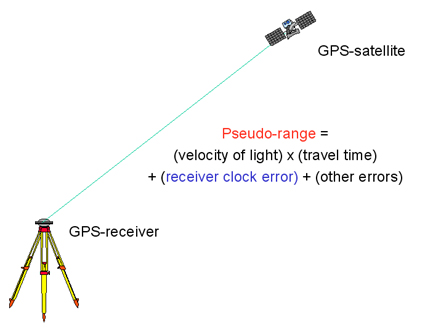

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them using Gradient Descent method


.

###Step 0: Setup & Intialization

Step 0.1: Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Step 0.2: Read and parse data files

In [ ]:
df_pseudorange = pd.read_excel('/content/pseudoranges1.xlsx')
df_sat_pos = pd.read_excel('/content/satellite_position1.xlsx')

pseudorange = df_pseudorange['P'].to_numpy()
sat_pos =df_sat_pos[['x','y','z']].to_numpy()

n = pseudorange.size

print(df_pseudorange)
print(df_sat_pos)



    Satellite_ID             P
0              7  2.291974e+07
1              8  2.045989e+07
2             11  2.240034e+07
3             15  2.282914e+07
4             17  2.234201e+07
5             18  2.564645e+07
6             19  2.381478e+07
7             24  2.431140e+07
8             26  2.135364e+07
9             27  2.497161e+07
10            28  2.063898e+07
    Satellite_ID             x             y             z
0              7  5.280792e+06 -2.550146e+07  4.649508e+06
1              8 -2.159656e+06 -2.111602e+07  1.559791e+07
2             11  1.037185e+07 -2.171311e+07  1.055869e+07
3             15 -1.608576e+07  4.285071e+06  2.074204e+07
4             17 -1.431299e+07 -2.204501e+07  4.671208e+06
5             18 -2.435718e+06  1.625721e+07  2.109978e+07
6             19  1.591247e+07 -3.462515e+06  2.105363e+07
7             24  1.627185e+07 -2.187663e+05  2.103533e+07
8             26 -1.924704e+07 -7.259804e+06  1.647298e+07
9             27 -1.593115e+07  1.2077

Step 0.3: Define the groundtruth of receiver's position in ECEF (m)

In [ ]:
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])
differences = sat_pos - GroundTruth  # Subtracts GroundTruth from each satellite position
print(differences)

[[  6914281.11804288 -21849832.93670967   -302973.33145001]
 [  -526166.67237928 -17464397.60951267  10645427.57757292]
 [ 12005341.54796995 -18061484.16727347   5606205.37857182]
 [-14452271.40151165   7936698.39862672  15789560.50514712]
 [-12679498.70095065 -18393387.08342177   -281273.22068388]
 [  -802228.80769578  19908832.31201363  16147297.91836112]
 [ 17545956.56654685    189111.86757761  16101146.63378582]
 [ 17905337.54356225   3432860.8621928   16082851.08421872]
 [-17613546.14899045  -3608176.49641879  11520500.28764872]
 [-14297662.65678055  15728994.43408823  13105595.14530122]
 [ -6046524.72876274 -10203835.54063167  16890493.75326202]]


Step 0.4: Intialize empty arrays

In [ ]:
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0


# Example initial parameters and setup
learning_rate = 0.01
max_steps = 100  # Maximum iterations
threshold = 1e-6  # Stopping criterion for cost

# Example initial guess for parameters (3D, for demonstration)
params = np.array([0.0, 0.0, 0.0])

# GroundTruth position (you already provided this)
GroundTruth = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# Gradient descent loop
while steps_count < max_steps:
    # Example cost calculation: Euclidean distance from params to GroundTruth
    cost = np.linalg.norm(params - GroundTruth)

    # Example gradient calculation (negative gradient pointing toward GroundTruth)
    grad = params - GroundTruth

    # Example error (can be refined based on your application)
    err = cost

    # Store the values in their respective arrays
    arr_cost.append(cost)
    arr_grad.append(grad)
    arr_err.append(err)

    # Update parameters with gradient descent step
    params -= learning_rate * grad  # Update parameters toward GroundTruth

    # Increment steps_count
    steps_count += 1

    # Check stopping criterion based on cost
    if cost < threshold:
        print("Converged at step:", steps_count)
        break

# Convert lists to numpy arrays for analysis after loop completes
arr_cost = np.array(arr_cost)
arr_grad = np.array(arr_grad)
arr_err = np.array(arr_err)

# Output final results
print("Final parameters:", params)
print("Final cost:", arr_cost[-1])
print("Total steps:", steps_count)


Final parameters: [-1035579.43758903 -2315013.53543486  3139713.17723296]
Final cost: 2353808.837848598
Total steps: 100


Step 0.5: Function that
computes the euclidean distance between satellite and receiver

In [ ]:
def euclidean_norm(receiver_pos, satellite_pos):
    """
    Computes the Euclidean distance

    Returns:
    np.array: A 1D array of distances from the receiver to each satellite.
    """


    # Calculate the Euclidean (distance)
    distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)

    return distance

# Define the receiver position
receiver_pos = np.array([-1633489.37967725, -3651627.18250363, 4952481.61954918])

# Define satellite positions (example data)
satellite_pos = np.array([
    [15600, 7540, 20140],
    [18760, 2750, 18610],
    [17610, 14630, 13480]
])

# Calculate distances
distances = euclidean_norm(receiver_pos, satellite_pos)
print("Distances:", distances)






Distances: [6359008.89318555 6358261.5362094  6368776.01174193]


### Step 1: Define the Cost Function (4 marks)
Define a cost function that computes the sum of squared residuals between measured and predicted pseudoranges.

The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.

The function returns a single scalar.

Call euclidean_norm function to calculate geometric distance.

In [3]:
# Cost function: sum of squared residuals between measured and predicted pseudoranges
def cost_function(r_pos, cdT, s_pos, pseudorange):
    import numpy as np
    import numpy as np

def euclidean_norm(a, b):
    """Calculate the Euclidean distance between two points a and b."""
    return np.linalg.norm(a - b)

def cost_function(r_pos, cdT, s_pos, pseudorange):
    """
    Calculate the sum of squared residuals between measured and predicted pseudoranges.

    Parameters:
    r_pos : array-like, shape (3,)
        Receiver's coordinates (x, y, z).
    cdT : float
        Receiver's clock offset.
    s_pos : array-like, shape (n, 3)
        Coordinates of the satellites (each row is a satellite's position).
    pseudorange : array-like, shape (n,)
        Observed pseudoranges.

    Returns:
    float
        Sum of squared residuals between measured and predicted pseudoranges.
    """
    predicted_ranges = np.array([euclidean_norm(r_pos, s) + cdT for s in s_pos])
    residuals = pseudorange - predicted_ranges
    return np.sum(residuals ** 2)

# Example usage
r_pos = np.array([0, 0, 0])  # Replace with actual receiver coordinates
cdT = 0  # Replace with actual clock offset
s_pos = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])  # Replace with satellite positions
pseudorange = np.array([1.5, 2.5, 3.5])  # Replace with observed pseudoranges

# Calculate the cost
cost = cost_function(r_pos, cdT, s_pos, pseudorange)
print("Sum of squared residuals:", cost)


Sum of squared residuals: 3.860272542658172


### Step 2: Define the Gradient Computation Function (4 marks)

Define a gradient computation function that calculates the gradient of the cost function with respect to the estimates (x_r, y_r, z_r, cdT).


The function's inputs are: the receiver's coordinates, clock offset, satellites' coordinates, observed pseudoranges.


The function returns a 1D numpy array that contains 4 elements.


Call euclidean_norm function to calculate geometric distance.


In [4]:
# Gradient of the cost function with respect to the unknowns (x_r, y_r, z_r, cdT)
def gradient(r_pos, cdT, s_pos, pseudorange):
    import numpy as np

def euclidean_norm(a, b):
    """Calculate the Euclidean distance between two points a and b."""
    return np.linalg.norm(a - b)

def gradient(r_pos, cdT, s_pos, pseudorange):
    """
    Calculate the gradient of the cost function with respect to (x_r, y_r, z_r, cdT).

    Parameters:
    r_pos : array-like, shape (3,)
        Receiver's coordinates (x_r, y_r, z_r).
    cdT : float
        Receiver's clock offset.
    s_pos : array-like, shape (n, 3)
        Coordinates of the satellites (each row is a satellite's position).
    pseudorange : array-like, shape (n,)
        Observed pseudoranges.

    Returns:
    np.array
        Gradient of the cost function with respect to (x_r, y_r, z_r, cdT).
    """
    grad = np.zeros(4)
    n = len(pseudorange)

    for i in range(n):
        distance = euclidean_norm(r_pos, s_pos[i])
        predicted_range = distance + cdT
        residual = pseudorange[i] - predicted_range

        # Compute partial derivatives for x_r, y_r, z_r (geometric distance components)
        diff_vector = (r_pos - s_pos[i]) / distance if distance != 0 else np.zeros(3)
        grad[:3] -= 2 * residual * diff_vector  # Gradient w.r.t. x_r, y_r, z_r

        # Compute partial derivative for cdT
        grad[3] -= 2 * residual  # Gradient w.r.t. cdT

    return grad

# Example usage
r_pos = np.array([0, 0, 0])  # Replace with actual receiver coordinates
cdT = 0  # Replace with actual clock offset
s_pos = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])  # Replace with satellite positions
pseudorange = np.array([1.5, 2.5, 3.5])  # Replace with observed pseudoranges

# Calculate the gradient
grad = gradient(r_pos, cdT, s_pos, pseudorange)
print("Gradient:", grad)


Gradient: [-3.33974596 -3.33974596 -3.33974596  5.78460969]


### Step 3: Gradient Descent Implementation (4 marks)
Construct the implementation function of gradient descent

Replace '...' with actual implementation

The function's input are: observed pseudoranges, satellites' positions, learning_rate, maximum loop iterations, tolerance

The function will return a 1D numpy array that contains the optimized estimates (x_r, y_r, z_r, cdT)

The function set learning_rate, max_iters and tolerance as: 0.01, 100000, 1e-6 as default values

These default hyperparameters values can be overridden by passing your own values when calling the function


In [5]:
# Gradient descent algorithm for non-linear least squares estimation
def cost_function(r_pos, cdT, s_pos, pseudorange):
    predicted_ranges = np.array([euclidean_norm(r_pos, s) + cdT for s in s_pos])
    residuals = pseudorange - predicted_ranges
    return np.sum(residuals ** 2)

# Gradient descent algorithm for non-linear least squares estimation
def gradient_descent(pseudorange, s_pos, learning_rate=0.01, max_iters=100000, tolerance=1e-6):
    global steps_count

    # Initialize the estimates as zeros
    X = np.array([0.0, 0.0, 0.0, 0.0])
    arr_cost = []
    arr_grad = []

    for iteration in range(max_iters):
        r_pos = X[:3]
        cdT = X[3]

        # Compute the cost in the current step
        current_cost = cost_function(r_pos, cdT, s_pos, pseudorange)

        # Compute the gradients in the current step
        grad = gradient(r_pos, cdT, s_pos, pseudorange)

        # Update estimates
        X_new = X - learning_rate * grad

        # Compute the new cost
        new_cost = cost_function(X_new[:3], X_new[3], s_pos, pseudorange)

        # Break the loop if convergence criteria is met
        if np.abs(new_cost - current_cost) < tolerance:
            print("Converged!")
            steps_count = iteration
            break

        # Update the parameters for the next iteration
        X = X_new

        # Collect intermediate results for cost and gradients
        arr_cost.append(current_cost)
        arr_grad.append(grad)

    return X

# Example usage
pseudorange = np.array([1.5, 2.5, 3.5])  # Replace with observed pseudoranges
s_pos = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])  # Replace with satellite positions
result = gradient_descent(pseudorange, s_pos)
print("Optimized estimates (x_r, y_r, z_r, cdT):", result)


Converged!
Optimized estimates (x_r, y_r, z_r, cdT): [ 0.27799439  0.27799439  0.27799439 -0.48150041]


### Step 4: Parameters Optimization & Results Printing (3 marks)

Call *gradient_descent* function to optimize the estimating parameters using default optimization hyperparameters

Print:

*   optimized parameters
*   final position errors of receiver
*   number of steps taken for convergence
*   final cost value
*   final gradient values








In [6]:
# Call the gradient_descent function to optimize the estimating parameters
optimized_params = gradient_descent(pseudorange, s_pos)

# Compute the final position errors of receiver (assuming GroundTruth is known)
# Replace with actual ground truth values if available
GroundTruth = np.array([0, 0, 0])  # Replace with known ground truth for comparison
position_error = optimized_params[:3] - GroundTruth

# Print the mentioned metrics
print("Optimized parameters (x_r, y_r, z_r, cdT):", optimized_params)
print("Final position errors of receiver:", position_error)
print("Number of steps taken for convergence:", steps_count)

# Compute and print final cost and gradient values
final_cost = cost_function(optimized_params[:3], optimized_params[3], s_pos, pseudorange)
final_grad = gradient(optimized_params[:3], optimized_params[3], s_pos, pseudorange)

print("Final cost value:", final_cost)
print("Final gradient values:", final_grad)


Converged!
Optimized parameters (x_r, y_r, z_r, cdT): [ 0.27799439  0.27799439  0.27799439 -0.48150041]
Final position errors of receiver: [0.27799439 0.27799439 0.27799439]
Number of steps taken for convergence: 53
Final cost value: 1.071800404939673
Final gradient values: [-0.00381325 -0.00381325 -0.00381325  0.00660474]


### Step 5: Cost vs Steps Plot & Analysis (2 marks)
Plot cost vs steps

Use 'semilogy' to scale y-axis

Label each axis

Include figure title

Comment on the pattern from the plot

Converged in 54 steps!


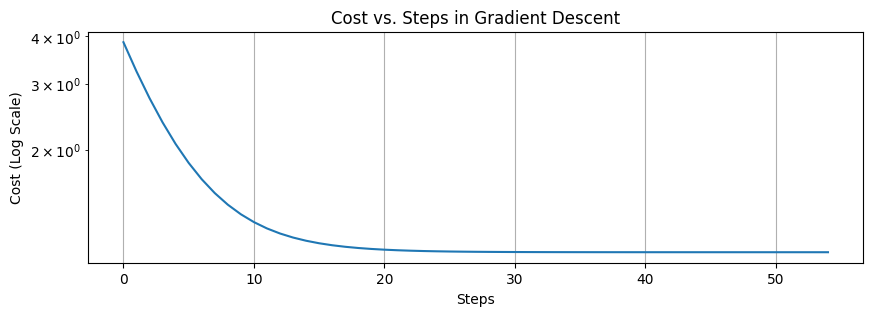

In [7]:
def gradient_descent(pseudorange, s_pos, learning_rate=0.01, max_iters=100000, tolerance=1e-6):
    X = np.zeros(4)  # Initialize (x_r, y_r, z_r, cdT)
    cost_history = []

    for i in range(max_iters):
        r_pos, cdT = X[:3], X[3]
        current_cost = cost_function(r_pos, cdT, s_pos, pseudorange)
        cost_history.append(current_cost)
        grad = gradient(r_pos, cdT, s_pos, pseudorange)
        X -= learning_rate * grad  # Update estimates

        # Check for convergence
        if i > 0 and abs(cost_history[-1] - cost_history[-2]) < tolerance:
            print(f"Converged in {i} steps!")
            break

    return X, cost_history

# Run the gradient descent
optimized_params, cost_history = gradient_descent(pseudorange, s_pos)

# Plotting
plt.figure(figsize=(10, 3))
plt.semilogy(cost_history)
plt.xlabel('Steps')
plt.ylabel('Cost (Log Scale)')
plt.title('Cost vs. Steps in Gradient Descent')
plt.grid(True)
plt.show()


### Step 6: Gradients vs Steps & Analysis(2 marks)
Plot gradients vs steps

use 'symlog' to scale y-axis

use 'tick_params' and set y-axis: labelsize=8

include axes' labels, legends and title

Comment on the pattern from the plot

Converged in 125 steps!


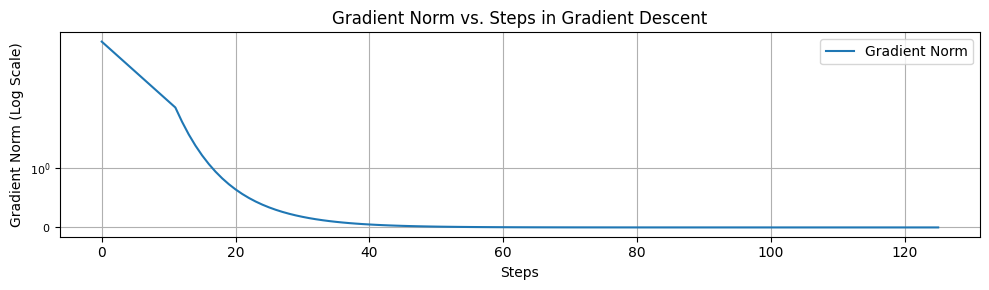

In [8]:
# Update gradient_descent to store gradients at each step
def gradient_descent(pseudorange, s_pos, learning_rate=0.01, max_iters=100000, tolerance=1e-6):
    X = np.zeros(4)  # Initialize (x_r, y_r, z_r, cdT)
    grad_history = []

    for i in range(max_iters):
        r_pos, cdT = X[:3], X[3]
        grad = gradient(r_pos, cdT, s_pos, pseudorange)
        grad_history.append(np.linalg.norm(grad))  # Store the norm of the gradient for plotting
        X -= learning_rate * grad  # Update estimates

        # Check for convergence using gradient norm
        if i > 0 and np.linalg.norm(grad) < tolerance:
            print(f"Converged in {i} steps!")
            break

    return X, grad_history

# Run gradient descent and collect gradient history
optimized_params, grad_history = gradient_descent(pseudorange, s_pos)

# Plotting gradients vs. steps
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(grad_history)
ax.set_yscale('symlog')  # Use 'symlog' for better scaling of y-axis
ax.set_xlabel('Steps')
ax.set_ylabel('Gradient Norm (Log Scale)')
ax.set_title('Gradient Norm vs. Steps in Gradient Descent')
ax.tick_params(axis='y', labelsize=8)
ax.legend(['Gradient Norm'])
ax.grid(True)

fig.tight_layout()
plt.show()

# Comment on the pattern
# The plot typically shows a decrease in gradient magnitude as steps increase, indicating that the gradient descent
# is approaching a local minimum. If the gradient norm flattens near zero, it means convergence has been achieved.


### Step 7: Positioning errors vs Steps & Analysis(2 marks)
Plot positioning errors vs steps

Include axes' labels, legends and title

Comment on the pattern of the plot

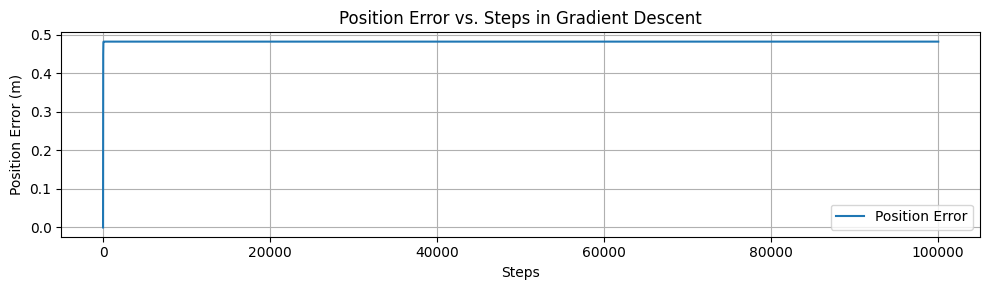

In [9]:
# Assuming gradient and cost_function are already defined

def gradient_descent(pseudorange, s_pos, ground_truth, learning_rate=0.01, max_iters=100000, tolerance=1e-6):
    X = np.zeros(4)  # Initialize (x_r, y_r, z_r, cdT)
    position_errors = []

    for i in range(max_iters):
        r_pos, cdT = X[:3], X[3]

        # Compute position error as the Euclidean distance to the ground truth
        position_error = np.linalg.norm(r_pos - ground_truth)
        position_errors.append(position_error)

        # Compute the gradient and update the position estimate
        grad = gradient(r_pos, cdT, s_pos, pseudorange)
        X -= learning_rate * grad  # Update estimates

        # Check for convergence based on position error
        if i > 0 and position_error < tolerance:
            print(f"Converged in {i} steps!")
            break

    return X, position_errors

# Example ground truth (replace with actual ground truth)
ground_truth = np.array([0, 0, 0])  # Receiver's true position (example)

# Run gradient descent
optimized_params, position_errors = gradient_descent(pseudorange, s_pos, ground_truth)

# Plotting position errors vs. steps
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))
ax.plot(position_errors)
ax.set_xlabel('Steps')
ax.set_ylabel('Position Error (m)')
ax.set_title('Position Error vs. Steps in Gradient Descent')
ax.legend(['Position Error'])
ax.grid(True)

fig.tight_layout()
plt.show()

# Comment on the pattern
# The plot should show a decreasing trend in the position error as the algorithm progresses. Initially, the error will be large,
# but as the gradient descent iterates, the error should reduce, indicating that the estimated position is approaching the true position.
# Once the error becomes small and stabilizes, the optimization is likely to have converged to a solution close to the true position.



# Hyperparameters Tuning

### Step 8: Tuning Learning rate (2 marks)

Change learning rate to 0.01, 0.001 and repeat step 4.

(*hint: you may need to adjust the maximum loop iterations in this case*)

In [ ]:
#set learning rate to 0.01
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_2 = #...

# print the metrics
# ...

In [ ]:
#set learning rate to 0.001
#re-initialize arrays and counters
arr_cost= []
arr_grad= []
arr_err=[]
steps_count=0

optimized_params_3 = #...

# print the metrics
# ...

## Step 9: Results Analysis (2 marks)

Q1. Comment on the difference that you notice after changing the learning rate. (1 mark)

Q2. What is the difference between LSE and Gradient Descent? (Comment based on your results and the methodology) (1 mark)



ANSWER HERE

---
---

# **Logistic Regression (50 marks)**

The following dataset helps to predict phishing webpages. It is collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.

It can be downloaded from : https://archive.ics.uci.edu/dataset/327/phishing+websites

<u>Class labels:</u>

Not phishing = -1

Phishing = 1



Follow the steps provided to perform binary classification using logistic regression and complete the code for each part.


### Step 0: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Data Input (2 mark)

Use the `fetch_ucirepo(id=<ID>)`  to load the phishing dataset (id = 327) as a dataframe into the feature matrix `X` and target vector `y`.

Print the size of `X` and `y`


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# Below code fetches dataset
phishing_websites = fetch_ucirepo(id=327)

# TO DO: data (as pandas dataframes) (1 mark)

# TO DO: display sizes of X and y (1 mark)


### Step 2.1: Class label histogram (2 marks)

Plot the histogram for each class label to visualise class imbalance. Additionally before calling .show() for the plot, ensure that the code displays you the exact value of the samples for each class above the respective bins.

In [ ]:
# TO DO: Check the class distribution of y (2 mark)


# Display exact values for each bin in the histogram

plt.show()

### Step 2.2: Smaller dataset creation(2 mark)


We also want to test if the model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

Use random_state = 42


In [ ]:
# TO DO: Create a smaller dataset with 3% of the data


# TO DO: display sizes of X_small and y_small (2 mark)


### Step 3: Implement Machine Learning Model (6 marks)

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets:
    - `X` and `y` (1 mark)
    - Only first two columns of `X` and `y` (1 mark)
    - `X_small` and `y_small` (1 mark)

### Step 4: Test Model (6 x 3 = 18 marks)

Calculate the following for the **three different tests** implemented in Step 3
1. data size (1 mark)
1. number of training samples (1 mark)
2. number of testing samples (1 mark)
4. training accuracy (1 marks)
5. testing accuracy (1 marks)
6. log loss (1 mark)

### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training samples, testing samples, training accuracy, testing accuracy, log loss
2. Add these columns for each dataset to the `results` DataFrame
3. Print `results`

For any **random state** parameters from this step onwards, you can use random_state = 0;

In [ ]:
#TO DO: Complete steps 3,4, and 5.1 in this code block (Total 27 marks)

# Note: 70% training set, 30% testing set
# HINT: create a function that calculates all required information



### Step 5.2: Visualize Classification Errors (6 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [ ]:
# TO DO: Retrieve target vector and predicted values for testing set using full dataset and print the dimension of the predicted output (2 mark)
# Note: 70% training set, 30% testing set


In [ ]:
import seaborn as sns

# TO DO: Calculate confusion matrix (2 marks) : conf_mat

# Below code prints confusion matrix using a heatmap
sns.heatmap(conf_mat, xticklabels=['not phishing', 'phishing'],  yticklabels=['not phishing', 'phishing'], square=True, annot=True, cbar=False, fmt='d')
plt.xlabel('predicted value')
plt.ylabel('true value')

In [ ]:
# TO DO: Print classification report (2 marks)


### Questions (11 marks)
1. Is the dataset imbalanced? Does it affect model performance? (1 mark)
2. Does the model overfit or underfit for each of the 3 cases? (3 marks)
3. How do the training and testing accuracy change depending on the amount of data used? Explain with values. (1 mark)
4. In this case, what do a false positive and a false negative represent? Which one is worse? (2 marks)
5. Based on your answer to question 4, would you want to maximize precision or recall? How would you do this? (2 marks)
6. Based on the Log Loss for each of the 3 cases, what can you say about the model in each instance? What is potentially causing these differences? (2 mark)


ANSWER HERE

---
---